In [ ]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

In [12]:
from src.experiment import Experiment

from qiskit import qpy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from model_validator.validator import is_feasible

In [32]:
# print("TwoLocal\n")

# for num_bonds in [15,20,25,26,27,28,29,30]:
#     exp_id = 0
#     path = f'1/test_bonds/Bonds{num_bonds}_TwoLocal2rep_piby3_AerSimulator_0p1/exp{exp_id}.pkl'
#     ds = Experiment.read_experiment(path)
#     print(f' Bonds: {num_bonds}\n Time: {ds.step3_time}\n num_evals: {len(ds.step3_iter_best_fx)}\n refval: {ds.refvalue}\n best_x: {ds.step3_result_best_fx}\n')

### TwoLocal, alpha=0.1, rep=2, bilinear

In [ ]:
num_bonds = [15,20,25,30]
runs = 10
rel_gap = np.zeros((len(num_bonds),runs))
time = np.zeros((len(num_bonds),runs))
is_feasible_check = np.zeros((len(num_bonds),runs))
num_evals = np.zeros((len(num_bonds),runs))


for (id_bond, num_bond) in enumerate(num_bonds):
    for exp_id in range(runs):
        path = f'1/scaling/Bonds{num_bond}_TwoLocal2rep_piby3_AerSimulator_0p1/exp{exp_id}.pkl'
        ds = Experiment.read_experiment(path)
        rel_gap[id_bond,exp_id] = (ds.step3_result_best_fx-ds.refvalue)/ds.step3_result_best_fx
        time[id_bond,exp_id] = ds.step3_time
        num_evals[id_bond,exp_id] = len(ds.step3_iter_best_fx)
        is_feasible_check[id_bond,exp_id] = is_feasible(f'../data/1/scaling/normalized_problem_{num_bond}bonds_v3.lp',ds.step3_result_best_x)
        # print(f' Bonds: {num_bond}\n Time: {ds.step3_time}\n num_evals: {len(ds.step3_iter_best_fx)}\n refval: {ds.refvalue}\n best_x: {ds.step3_result_best_fx}\n')

#### Is the solution feasible?

In [58]:
np.sum(is_feasible_check == True, axis=1)/runs

array([1., 1., 1., 1.])

#### Relative Gap

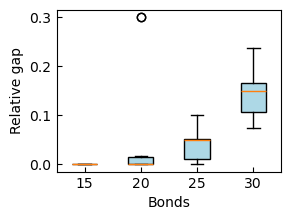

In [61]:
plt.figure(figsize=(2.9, 2.1))
# Create the boxplot

# sns.boxplot(data=df)
# sns.boxplot(data=df_melted, patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)
plt.boxplot(list(rel_gap), patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)

plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Relative gap")
new_labels = [15, 20, 25, 30]
plt.xticks(ticks=np.arange(1, len(new_labels) + 1), labels=new_labels)
plt.xlabel('Bonds')
plt.savefig("imgs/SCALING_RELGAP_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Time

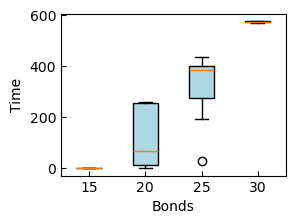

In [62]:
plt.figure(figsize=(2.9, 2.1))
# Create the boxplot

# sns.boxplot(data=df)
# sns.boxplot(data=df_melted, patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)
plt.boxplot(list(time), patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)

plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Time")
new_labels = [15, 20, 25, 30]
plt.xticks(ticks=np.arange(1, len(new_labels) + 1), labels=new_labels)
plt.xlabel('Bonds')
plt.savefig("imgs/SCALING_TIME_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Ansatz Characteristics

In [ ]:
num_bonds = [15,20,25,30]


for (id_bond, num_bond) in enumerate(num_bonds):
    print(f"Bonds: {num_bond}")

    path = f'../data/1/scaling/Data_Scaling/Bonds{num_bond}_TwoLocal2rep_piby3_AerSimulator_0p1/isa_ansatz.qpy'
    
    with open(path, 'rb') as fd:
        isa_ansatz = qpy.load(fd)[0]
    print('depth:', isa_ansatz.depth(), '    2q-depth: ', isa_ansatz.depth(lambda x:x.operation.num_qubits==2), '      num params: ', isa_ansatz.num_parameters)
    print(f"num-q/width: {isa_ansatz.num_qubits}, \ncount ops: {isa_ansatz.count_ops()}\n")


Bonds: 15
depth: 8     2q-depth:  4       num params:  45
num-q/width: 15, 
count ops: OrderedDict([('ry', 45), ('cz', 28), ('measure', 15), ('barrier', 1)])

Bonds: 20
depth: 8     2q-depth:  4       num params:  60
num-q/width: 20, 
count ops: OrderedDict([('ry', 60), ('cz', 38), ('measure', 20), ('barrier', 1)])

Bonds: 25
depth: 8     2q-depth:  4       num params:  75
num-q/width: 25, 
count ops: OrderedDict([('ry', 75), ('cz', 48), ('measure', 25), ('barrier', 1)])

Bonds: 30
depth: 8     2q-depth:  4       num params:  90
num-q/width: 30, 
count ops: OrderedDict([('ry', 90), ('cz', 58), ('measure', 30), ('barrier', 1)])



### BFCD, alpha=0.1, rep=2, bilinear

In [ ]:
num_bonds = [15,20,25,30]
runs = 10
rel_gap = np.zeros((len(num_bonds),runs))
time = np.zeros((len(num_bonds),runs))
is_feasible_check = np.zeros((len(num_bonds),runs))
num_evals = np.zeros((len(num_bonds),runs))


for (id_bond, num_bond) in enumerate(num_bonds):
    for exp_id in range(runs):
        path = f'1/scaling/Bonds{num_bond}_bfcd2rep_piby3_AerSimulator_0p1/exp{exp_id}.pkl'
        ds = Experiment.read_experiment(path)
        rel_gap[id_bond,exp_id] = (ds.step3_result_best_fx-ds.refvalue)/ds.step3_result_best_fx
        time[id_bond,exp_id] = ds.step3_time
        num_evals[id_bond,exp_id] = len(ds.step3_iter_best_fx)
        is_feasible_check[id_bond,exp_id] = is_feasible(f'../data/1/scaling/normalized_problem_{num_bond}bonds_v3.lp',ds.step3_result_best_x)
        # print(f' Bonds: {num_bond}\n Time: {ds.step3_time}\n num_evals: {len(ds.step3_iter_best_fx)}\n refval: {ds.refvalue}\n best_x: {ds.step3_result_best_fx}\n')

#### Is the solution feasible?

In [47]:
np.sum(is_feasible_check == True, axis=1)/runs

array([1., 1., 1., 1.])

#### Relative Gap

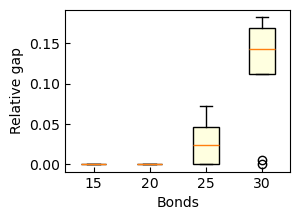

In [64]:
plt.figure(figsize=(2.9, 2.1))
# Create the boxplot

# sns.boxplot(data=df)
# sns.boxplot(data=df_melted, patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)
plt.boxplot(list(rel_gap), patch_artist=True, boxprops=dict(facecolor='lightyellow'))#,showfliers=False)

plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Relative gap")
new_labels = [15, 20, 25, 30]
plt.xticks(ticks=np.arange(1, len(new_labels) + 1), labels=new_labels)
plt.xlabel('Bonds')
plt.savefig("imgs/SCALING_RELGAP_bfcd_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Time

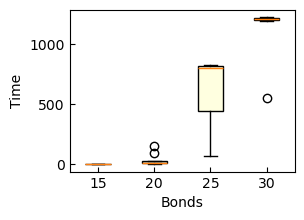

In [65]:
plt.figure(figsize=(2.9, 2.1))
# Create the boxplot

# sns.boxplot(data=df)
# sns.boxplot(data=df_melted, patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)
plt.boxplot(list(time), patch_artist=True, boxprops=dict(facecolor='lightyellow'))#,showfliers=False)

plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Time")
new_labels = [15, 20, 25, 30]
plt.xticks(ticks=np.arange(1, len(new_labels) + 1), labels=new_labels)
plt.xlabel('Bonds')
plt.savefig("imgs/SCALING_TIME_bfcd_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Ansatz Characteristics

In [ ]:
num_bonds = [15,20,25,30]


for (id_bond, num_bond) in enumerate(num_bonds):
    print(f"Bonds: {num_bond}")

    path = f'../data/1/scaling/Data_Scaling/Bonds{num_bond}_bfcd2rep_piby3_AerSimulator_0p1/isa_ansatz.qpy'
    
    with open(path, 'rb') as fd:
        isa_ansatz = qpy.load(fd)[0]
    print('depth:', isa_ansatz.depth(), '    2q-depth: ', isa_ansatz.depth(lambda x:x.operation.num_qubits==2), '      num params: ', isa_ansatz.num_parameters)
    print(f"num-q/width: {isa_ansatz.num_qubits}, \ncount ops: {isa_ansatz.count_ops()}\n")


Bonds: 15
depth: 19     2q-depth:  8       num params:  86
num-q/width: 15, 
count ops: OrderedDict([('rx', 84), ('rzz', 56), ('ry', 30), ('measure', 15), ('barrier', 1)])

Bonds: 20
depth: 19     2q-depth:  8       num params:  116
num-q/width: 20, 
count ops: OrderedDict([('rx', 116), ('rzz', 76), ('ry', 40), ('measure', 20), ('barrier', 1)])

Bonds: 25
depth: 19     2q-depth:  8       num params:  146
num-q/width: 25, 
count ops: OrderedDict([('rx', 144), ('rzz', 96), ('ry', 50), ('measure', 25), ('barrier', 1)])

Bonds: 30
depth: 19     2q-depth:  8       num params:  176
num-q/width: 30, 
count ops: OrderedDict([('rx', 176), ('rzz', 116), ('ry', 60), ('measure', 30), ('barrier', 1)])

